# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

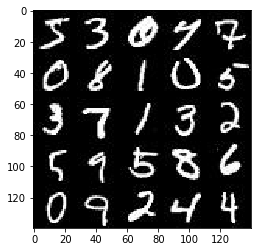

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

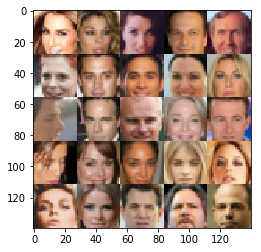

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


E:\Anaconda3\envs\tf1p1\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(dtype= tf.float32, shape=[None, image_width, image_height, image_channels], name =
                                'input_real')
    input_z  = tf.placeholder(dtype= tf.float32, shape=[None, z_dim], name = 'input_z')
    input_lr = tf.placeholder(dtype= tf.float32, name= 'learn_rate')
    return input_real, input_z, input_lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator', reuse=(not is_train)):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x256 now
              
        # Output layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    smooth = 0.1
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=(1 - smooth) * tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    # Optimize
    #print('UPDATE_OPS:', tf.get_collection(tf.GraphKeys.UPDATE_OPS))
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
   
    #print('data_shape:', data_shape)
    input_real, input_z, lr = model_inputs(data_shape[-3], data_shape[-2], data_shape[-1], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[-1])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images})
                
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                if steps % 100 == 0: 
                    show_generator_output(sess, 25, input_z, data_shape[-1], data_image_mode)                
                
                    
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [12]:
tf.reset_default_graph()

Epoch 1/2... Discriminator Loss: 0.5956... Generator Loss: 20.2038
Epoch 1/2... Discriminator Loss: 2.2612... Generator Loss: 0.7818
Epoch 1/2... Discriminator Loss: 1.5919... Generator Loss: 1.2584
Epoch 1/2... Discriminator Loss: 0.5640... Generator Loss: 2.4465
Epoch 1/2... Discriminator Loss: 0.7466... Generator Loss: 2.5791
Epoch 1/2... Discriminator Loss: 0.8629... Generator Loss: 1.6318
Epoch 1/2... Discriminator Loss: 0.9935... Generator Loss: 0.9913
Epoch 1/2... Discriminator Loss: 1.0980... Generator Loss: 0.9702
Epoch 1/2... Discriminator Loss: 1.0953... Generator Loss: 1.3555
Epoch 1/2... Discriminator Loss: 1.3697... Generator Loss: 0.5675


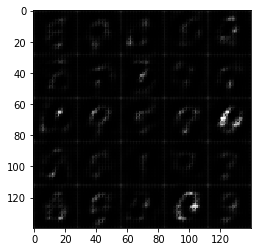

Epoch 1/2... Discriminator Loss: 1.4559... Generator Loss: 1.0325
Epoch 1/2... Discriminator Loss: 1.0175... Generator Loss: 1.0240
Epoch 1/2... Discriminator Loss: 2.2887... Generator Loss: 0.1895
Epoch 1/2... Discriminator Loss: 1.1942... Generator Loss: 0.7870
Epoch 1/2... Discriminator Loss: 1.3011... Generator Loss: 0.7443
Epoch 1/2... Discriminator Loss: 1.1971... Generator Loss: 1.0248
Epoch 1/2... Discriminator Loss: 1.4096... Generator Loss: 0.5268
Epoch 1/2... Discriminator Loss: 1.0493... Generator Loss: 1.1209
Epoch 1/2... Discriminator Loss: 1.1054... Generator Loss: 1.8336
Epoch 1/2... Discriminator Loss: 1.5158... Generator Loss: 2.2031


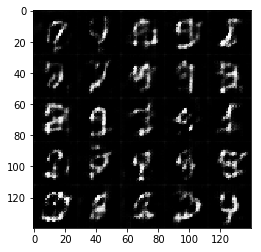

Epoch 1/2... Discriminator Loss: 1.1303... Generator Loss: 1.3063
Epoch 1/2... Discriminator Loss: 1.1239... Generator Loss: 1.0325
Epoch 1/2... Discriminator Loss: 1.2394... Generator Loss: 0.6478
Epoch 1/2... Discriminator Loss: 0.8756... Generator Loss: 1.7094
Epoch 1/2... Discriminator Loss: 1.1174... Generator Loss: 1.5477
Epoch 1/2... Discriminator Loss: 0.9215... Generator Loss: 1.3473
Epoch 1/2... Discriminator Loss: 0.9586... Generator Loss: 1.3797
Epoch 1/2... Discriminator Loss: 1.7519... Generator Loss: 2.7937
Epoch 1/2... Discriminator Loss: 1.1454... Generator Loss: 1.3952
Epoch 1/2... Discriminator Loss: 1.3683... Generator Loss: 0.5624


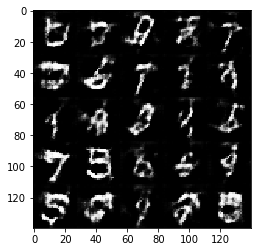

Epoch 1/2... Discriminator Loss: 1.1480... Generator Loss: 0.8509
Epoch 1/2... Discriminator Loss: 1.6665... Generator Loss: 2.8275
Epoch 1/2... Discriminator Loss: 1.1967... Generator Loss: 1.5354
Epoch 1/2... Discriminator Loss: 1.1038... Generator Loss: 1.1254
Epoch 1/2... Discriminator Loss: 1.1781... Generator Loss: 0.8007
Epoch 1/2... Discriminator Loss: 1.1013... Generator Loss: 0.8462
Epoch 1/2... Discriminator Loss: 1.4609... Generator Loss: 2.4629
Epoch 1/2... Discriminator Loss: 1.0090... Generator Loss: 1.0244
Epoch 1/2... Discriminator Loss: 1.2071... Generator Loss: 1.3147
Epoch 1/2... Discriminator Loss: 1.5493... Generator Loss: 2.3124


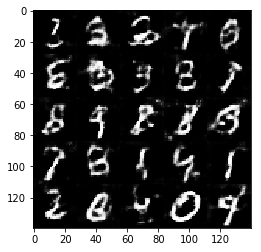

Epoch 1/2... Discriminator Loss: 1.4862... Generator Loss: 2.4893
Epoch 1/2... Discriminator Loss: 0.9826... Generator Loss: 1.1036
Epoch 1/2... Discriminator Loss: 1.1607... Generator Loss: 1.8445
Epoch 1/2... Discriminator Loss: 1.0845... Generator Loss: 0.8435
Epoch 1/2... Discriminator Loss: 0.9588... Generator Loss: 1.2991
Epoch 1/2... Discriminator Loss: 1.1121... Generator Loss: 1.4500
Epoch 2/2... Discriminator Loss: 1.0945... Generator Loss: 1.3697
Epoch 2/2... Discriminator Loss: 0.9885... Generator Loss: 1.2158
Epoch 2/2... Discriminator Loss: 1.1911... Generator Loss: 0.7178
Epoch 2/2... Discriminator Loss: 1.0967... Generator Loss: 0.9488


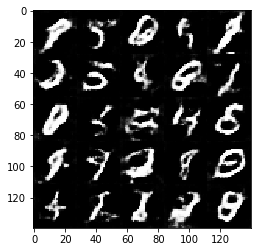

Epoch 2/2... Discriminator Loss: 1.2835... Generator Loss: 0.7000
Epoch 2/2... Discriminator Loss: 1.3288... Generator Loss: 0.6131
Epoch 2/2... Discriminator Loss: 1.1585... Generator Loss: 1.3743
Epoch 2/2... Discriminator Loss: 1.2764... Generator Loss: 0.6548
Epoch 2/2... Discriminator Loss: 1.5298... Generator Loss: 2.3847
Epoch 2/2... Discriminator Loss: 1.0981... Generator Loss: 1.5635
Epoch 2/2... Discriminator Loss: 1.0620... Generator Loss: 0.9283
Epoch 2/2... Discriminator Loss: 1.0553... Generator Loss: 1.3850
Epoch 2/2... Discriminator Loss: 1.1136... Generator Loss: 0.8721
Epoch 2/2... Discriminator Loss: 1.0083... Generator Loss: 1.4090


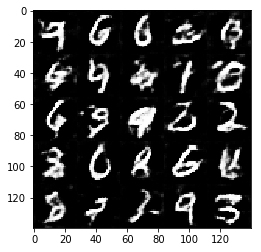

Epoch 2/2... Discriminator Loss: 1.3252... Generator Loss: 0.5912
Epoch 2/2... Discriminator Loss: 0.9983... Generator Loss: 1.2159
Epoch 2/2... Discriminator Loss: 2.3932... Generator Loss: 0.2039
Epoch 2/2... Discriminator Loss: 1.0199... Generator Loss: 0.9952
Epoch 2/2... Discriminator Loss: 1.0465... Generator Loss: 1.0467
Epoch 2/2... Discriminator Loss: 1.1859... Generator Loss: 1.3120
Epoch 2/2... Discriminator Loss: 1.5239... Generator Loss: 0.4896
Epoch 2/2... Discriminator Loss: 1.2053... Generator Loss: 0.6992
Epoch 2/2... Discriminator Loss: 1.0562... Generator Loss: 1.7425
Epoch 2/2... Discriminator Loss: 1.0083... Generator Loss: 1.0039


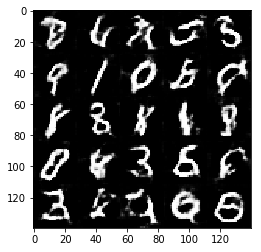

Epoch 2/2... Discriminator Loss: 1.2307... Generator Loss: 1.0722
Epoch 2/2... Discriminator Loss: 0.9830... Generator Loss: 1.0790
Epoch 2/2... Discriminator Loss: 1.0956... Generator Loss: 1.3050
Epoch 2/2... Discriminator Loss: 0.9946... Generator Loss: 1.0363
Epoch 2/2... Discriminator Loss: 1.1727... Generator Loss: 0.8547
Epoch 2/2... Discriminator Loss: 1.0309... Generator Loss: 0.9980
Epoch 2/2... Discriminator Loss: 0.9529... Generator Loss: 1.0890
Epoch 2/2... Discriminator Loss: 1.0878... Generator Loss: 1.3348
Epoch 2/2... Discriminator Loss: 0.8912... Generator Loss: 1.5124
Epoch 2/2... Discriminator Loss: 1.3218... Generator Loss: 2.0402


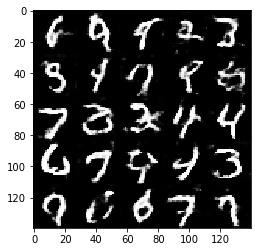

Epoch 2/2... Discriminator Loss: 0.9530... Generator Loss: 1.0148
Epoch 2/2... Discriminator Loss: 0.8983... Generator Loss: 1.3608
Epoch 2/2... Discriminator Loss: 0.9951... Generator Loss: 0.9840
Epoch 2/2... Discriminator Loss: 1.0836... Generator Loss: 1.8308
Epoch 2/2... Discriminator Loss: 1.1293... Generator Loss: 0.7592
Epoch 2/2... Discriminator Loss: 1.4636... Generator Loss: 0.5075
Epoch 2/2... Discriminator Loss: 1.2052... Generator Loss: 0.6499
Epoch 2/2... Discriminator Loss: 0.9858... Generator Loss: 1.5142
Epoch 2/2... Discriminator Loss: 0.8298... Generator Loss: 1.4075
Epoch 2/2... Discriminator Loss: 0.9434... Generator Loss: 1.4786


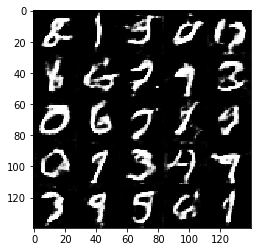

Epoch 2/2... Discriminator Loss: 1.3630... Generator Loss: 0.5375
Epoch 2/2... Discriminator Loss: 0.9571... Generator Loss: 1.6122
Epoch 2/2... Discriminator Loss: 1.0396... Generator Loss: 1.5188


In [13]:
batch_size = 128
z_dim = 96
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, 
          mnist_dataset.get_batches,
          mnist_dataset.shape, 
          mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.0721... Generator Loss: 11.2820
Epoch 1/1... Discriminator Loss: 2.2386... Generator Loss: 0.5656
Epoch 1/1... Discriminator Loss: 3.2114... Generator Loss: 0.1511
Epoch 1/1... Discriminator Loss: 1.1245... Generator Loss: 1.0333
Epoch 1/1... Discriminator Loss: 0.9143... Generator Loss: 1.8026
Epoch 1/1... Discriminator Loss: 0.4780... Generator Loss: 2.7766
Epoch 1/1... Discriminator Loss: 0.6590... Generator Loss: 2.0448
Epoch 1/1... Discriminator Loss: 0.6090... Generator Loss: 1.9819
Epoch 1/1... Discriminator Loss: 0.4289... Generator Loss: 3.0002
Epoch 1/1... Discriminator Loss: 1.9995... Generator Loss: 2.4299


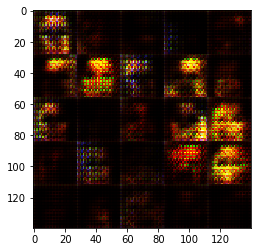

Epoch 1/1... Discriminator Loss: 0.8886... Generator Loss: 1.1884
Epoch 1/1... Discriminator Loss: 0.4030... Generator Loss: 4.2582
Epoch 1/1... Discriminator Loss: 0.4415... Generator Loss: 3.6345
Epoch 1/1... Discriminator Loss: 0.9579... Generator Loss: 2.0827
Epoch 1/1... Discriminator Loss: 0.6726... Generator Loss: 3.0145
Epoch 1/1... Discriminator Loss: 0.9970... Generator Loss: 3.6461
Epoch 1/1... Discriminator Loss: 1.0299... Generator Loss: 1.0456
Epoch 1/1... Discriminator Loss: 0.7936... Generator Loss: 1.2898
Epoch 1/1... Discriminator Loss: 0.5806... Generator Loss: 1.9371
Epoch 1/1... Discriminator Loss: 1.1746... Generator Loss: 3.5281


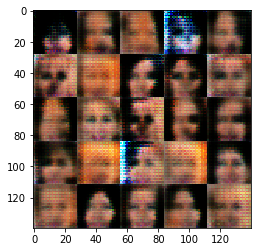

Epoch 1/1... Discriminator Loss: 0.7424... Generator Loss: 1.3606
Epoch 1/1... Discriminator Loss: 1.9083... Generator Loss: 0.2849
Epoch 1/1... Discriminator Loss: 1.7281... Generator Loss: 0.3736
Epoch 1/1... Discriminator Loss: 1.0867... Generator Loss: 0.8127
Epoch 1/1... Discriminator Loss: 1.4383... Generator Loss: 0.6340
Epoch 1/1... Discriminator Loss: 1.3698... Generator Loss: 0.7793
Epoch 1/1... Discriminator Loss: 1.2630... Generator Loss: 1.6741
Epoch 1/1... Discriminator Loss: 1.7879... Generator Loss: 0.3832
Epoch 1/1... Discriminator Loss: 1.0094... Generator Loss: 0.8697
Epoch 1/1... Discriminator Loss: 1.1197... Generator Loss: 0.9328


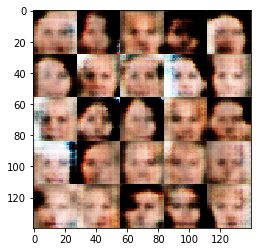

Epoch 1/1... Discriminator Loss: 1.4544... Generator Loss: 1.2311
Epoch 1/1... Discriminator Loss: 1.0886... Generator Loss: 1.1477
Epoch 1/1... Discriminator Loss: 1.4032... Generator Loss: 0.9249
Epoch 1/1... Discriminator Loss: 1.7552... Generator Loss: 2.6686
Epoch 1/1... Discriminator Loss: 1.2832... Generator Loss: 0.8893
Epoch 1/1... Discriminator Loss: 1.1907... Generator Loss: 0.9856
Epoch 1/1... Discriminator Loss: 1.1238... Generator Loss: 1.1867
Epoch 1/1... Discriminator Loss: 1.1671... Generator Loss: 1.5543
Epoch 1/1... Discriminator Loss: 1.6006... Generator Loss: 1.8380
Epoch 1/1... Discriminator Loss: 1.1972... Generator Loss: 0.7992


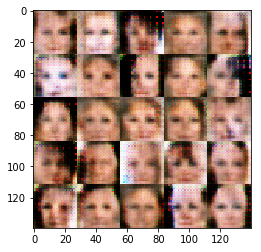

Epoch 1/1... Discriminator Loss: 1.1816... Generator Loss: 0.8416
Epoch 1/1... Discriminator Loss: 1.2988... Generator Loss: 0.9058
Epoch 1/1... Discriminator Loss: 1.2270... Generator Loss: 0.8094
Epoch 1/1... Discriminator Loss: 1.2012... Generator Loss: 0.7495
Epoch 1/1... Discriminator Loss: 1.0836... Generator Loss: 0.9203
Epoch 1/1... Discriminator Loss: 1.1175... Generator Loss: 0.8445
Epoch 1/1... Discriminator Loss: 1.5084... Generator Loss: 0.6876
Epoch 1/1... Discriminator Loss: 1.1929... Generator Loss: 1.0045
Epoch 1/1... Discriminator Loss: 1.7252... Generator Loss: 1.7852
Epoch 1/1... Discriminator Loss: 1.2695... Generator Loss: 0.8605


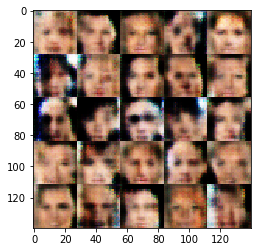

Epoch 1/1... Discriminator Loss: 1.1357... Generator Loss: 1.1124
Epoch 1/1... Discriminator Loss: 0.7814... Generator Loss: 1.4818
Epoch 1/1... Discriminator Loss: 1.6677... Generator Loss: 0.4156
Epoch 1/1... Discriminator Loss: 1.2744... Generator Loss: 1.0001
Epoch 1/1... Discriminator Loss: 1.3382... Generator Loss: 1.0419
Epoch 1/1... Discriminator Loss: 1.4950... Generator Loss: 0.6137
Epoch 1/1... Discriminator Loss: 1.2082... Generator Loss: 0.8330
Epoch 1/1... Discriminator Loss: 1.2577... Generator Loss: 0.5564
Epoch 1/1... Discriminator Loss: 1.2853... Generator Loss: 0.5868
Epoch 1/1... Discriminator Loss: 1.1501... Generator Loss: 0.7702


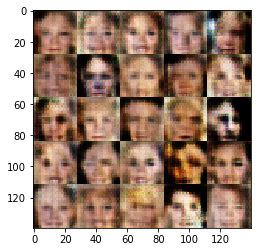

Epoch 1/1... Discriminator Loss: 1.6557... Generator Loss: 2.3102
Epoch 1/1... Discriminator Loss: 1.2546... Generator Loss: 0.8502
Epoch 1/1... Discriminator Loss: 1.4322... Generator Loss: 1.0014
Epoch 1/1... Discriminator Loss: 1.3740... Generator Loss: 0.5768
Epoch 1/1... Discriminator Loss: 1.3429... Generator Loss: 0.5753
Epoch 1/1... Discriminator Loss: 1.0745... Generator Loss: 0.8593
Epoch 1/1... Discriminator Loss: 0.8018... Generator Loss: 1.3289
Epoch 1/1... Discriminator Loss: 1.0294... Generator Loss: 0.8600
Epoch 1/1... Discriminator Loss: 1.3952... Generator Loss: 0.9275
Epoch 1/1... Discriminator Loss: 1.3527... Generator Loss: 0.7056


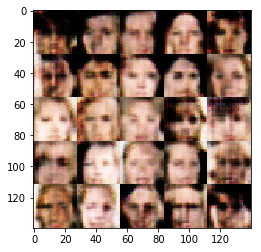

Epoch 1/1... Discriminator Loss: 1.0181... Generator Loss: 0.8773
Epoch 1/1... Discriminator Loss: 1.2173... Generator Loss: 1.0703
Epoch 1/1... Discriminator Loss: 1.1053... Generator Loss: 1.7817
Epoch 1/1... Discriminator Loss: 1.2600... Generator Loss: 0.9420
Epoch 1/1... Discriminator Loss: 2.2522... Generator Loss: 0.2077
Epoch 1/1... Discriminator Loss: 2.3626... Generator Loss: 0.1747
Epoch 1/1... Discriminator Loss: 1.1986... Generator Loss: 1.2439
Epoch 1/1... Discriminator Loss: 1.3672... Generator Loss: 0.8558
Epoch 1/1... Discriminator Loss: 1.2232... Generator Loss: 0.7727
Epoch 1/1... Discriminator Loss: 1.2304... Generator Loss: 0.9040


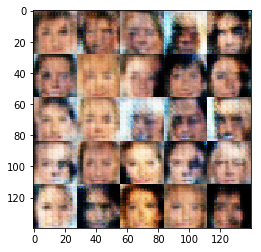

Epoch 1/1... Discriminator Loss: 1.5054... Generator Loss: 1.7775
Epoch 1/1... Discriminator Loss: 1.3995... Generator Loss: 0.7898
Epoch 1/1... Discriminator Loss: 1.4604... Generator Loss: 0.8634
Epoch 1/1... Discriminator Loss: 1.5643... Generator Loss: 0.6840
Epoch 1/1... Discriminator Loss: 1.4929... Generator Loss: 0.7661
Epoch 1/1... Discriminator Loss: 1.2923... Generator Loss: 0.9648
Epoch 1/1... Discriminator Loss: 1.4281... Generator Loss: 0.6982
Epoch 1/1... Discriminator Loss: 1.3872... Generator Loss: 0.8789
Epoch 1/1... Discriminator Loss: 1.3508... Generator Loss: 0.7504
Epoch 1/1... Discriminator Loss: 1.3891... Generator Loss: 0.7126


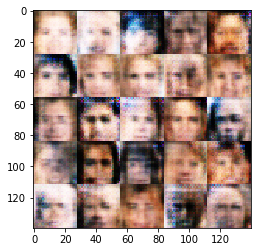

Epoch 1/1... Discriminator Loss: 1.5167... Generator Loss: 0.6640
Epoch 1/1... Discriminator Loss: 1.4154... Generator Loss: 0.8636
Epoch 1/1... Discriminator Loss: 1.3716... Generator Loss: 0.8194
Epoch 1/1... Discriminator Loss: 1.3478... Generator Loss: 0.8957
Epoch 1/1... Discriminator Loss: 1.2137... Generator Loss: 1.1253
Epoch 1/1... Discriminator Loss: 1.3580... Generator Loss: 0.8403
Epoch 1/1... Discriminator Loss: 1.3906... Generator Loss: 0.8904
Epoch 1/1... Discriminator Loss: 1.4231... Generator Loss: 0.7784
Epoch 1/1... Discriminator Loss: 1.2661... Generator Loss: 0.8939
Epoch 1/1... Discriminator Loss: 1.4407... Generator Loss: 0.8899


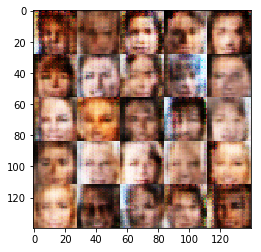

Epoch 1/1... Discriminator Loss: 1.2715... Generator Loss: 0.7997
Epoch 1/1... Discriminator Loss: 1.3918... Generator Loss: 0.8026
Epoch 1/1... Discriminator Loss: 1.2539... Generator Loss: 1.1077
Epoch 1/1... Discriminator Loss: 1.9918... Generator Loss: 1.0739
Epoch 1/1... Discriminator Loss: 1.4399... Generator Loss: 0.8017
Epoch 1/1... Discriminator Loss: 1.3684... Generator Loss: 0.5256
Epoch 1/1... Discriminator Loss: 1.1550... Generator Loss: 1.0893
Epoch 1/1... Discriminator Loss: 0.7034... Generator Loss: 2.2680
Epoch 1/1... Discriminator Loss: 1.4883... Generator Loss: 0.5260
Epoch 1/1... Discriminator Loss: 1.0168... Generator Loss: 1.0874


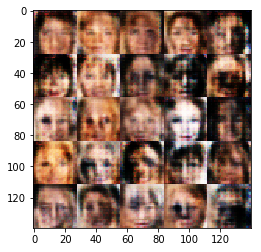

Epoch 1/1... Discriminator Loss: 1.6808... Generator Loss: 0.3423
Epoch 1/1... Discriminator Loss: 1.4679... Generator Loss: 0.8490
Epoch 1/1... Discriminator Loss: 1.3528... Generator Loss: 0.7966
Epoch 1/1... Discriminator Loss: 1.4725... Generator Loss: 0.8288
Epoch 1/1... Discriminator Loss: 1.2751... Generator Loss: 0.9018
Epoch 1/1... Discriminator Loss: 1.4494... Generator Loss: 0.8889
Epoch 1/1... Discriminator Loss: 1.4064... Generator Loss: 0.7787
Epoch 1/1... Discriminator Loss: 1.4015... Generator Loss: 0.7834
Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.8167
Epoch 1/1... Discriminator Loss: 1.3420... Generator Loss: 0.8061


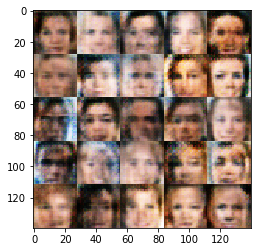

Epoch 1/1... Discriminator Loss: 1.4196... Generator Loss: 0.7451
Epoch 1/1... Discriminator Loss: 1.3925... Generator Loss: 0.9472
Epoch 1/1... Discriminator Loss: 1.3406... Generator Loss: 0.8817
Epoch 1/1... Discriminator Loss: 1.4422... Generator Loss: 0.6471
Epoch 1/1... Discriminator Loss: 1.4587... Generator Loss: 0.7715
Epoch 1/1... Discriminator Loss: 1.4164... Generator Loss: 0.8644
Epoch 1/1... Discriminator Loss: 1.4167... Generator Loss: 0.7086
Epoch 1/1... Discriminator Loss: 1.3813... Generator Loss: 0.7503
Epoch 1/1... Discriminator Loss: 1.3300... Generator Loss: 0.8069
Epoch 1/1... Discriminator Loss: 1.4319... Generator Loss: 0.7110


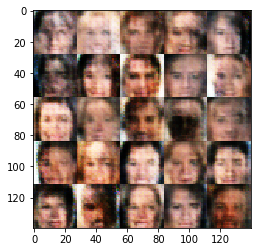

Epoch 1/1... Discriminator Loss: 1.3834... Generator Loss: 0.8664
Epoch 1/1... Discriminator Loss: 1.3649... Generator Loss: 0.9231
Epoch 1/1... Discriminator Loss: 1.3808... Generator Loss: 0.7731
Epoch 1/1... Discriminator Loss: 1.3988... Generator Loss: 0.7949
Epoch 1/1... Discriminator Loss: 1.4262... Generator Loss: 0.6589
Epoch 1/1... Discriminator Loss: 1.2880... Generator Loss: 0.7901
Epoch 1/1... Discriminator Loss: 1.3600... Generator Loss: 0.8493
Epoch 1/1... Discriminator Loss: 1.2696... Generator Loss: 0.7949
Epoch 1/1... Discriminator Loss: 1.3841... Generator Loss: 0.6833
Epoch 1/1... Discriminator Loss: 1.3236... Generator Loss: 0.9225


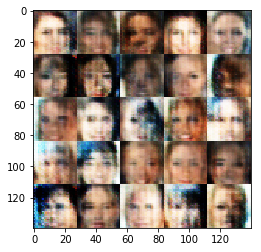

Epoch 1/1... Discriminator Loss: 1.5032... Generator Loss: 0.5738
Epoch 1/1... Discriminator Loss: 1.2528... Generator Loss: 0.8708
Epoch 1/1... Discriminator Loss: 1.3992... Generator Loss: 0.8708
Epoch 1/1... Discriminator Loss: 1.3287... Generator Loss: 0.8056
Epoch 1/1... Discriminator Loss: 1.5139... Generator Loss: 1.0471
Epoch 1/1... Discriminator Loss: 1.3345... Generator Loss: 0.7447
Epoch 1/1... Discriminator Loss: 1.3448... Generator Loss: 2.1674
Epoch 1/1... Discriminator Loss: 0.9470... Generator Loss: 0.8425
Epoch 1/1... Discriminator Loss: 1.2907... Generator Loss: 0.7942
Epoch 1/1... Discriminator Loss: 1.1863... Generator Loss: 0.9552


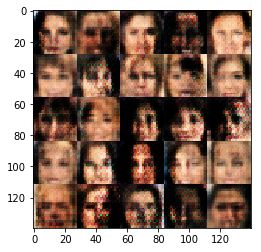

Epoch 1/1... Discriminator Loss: 1.3394... Generator Loss: 1.1112
Epoch 1/1... Discriminator Loss: 1.4369... Generator Loss: 1.4360
Epoch 1/1... Discriminator Loss: 1.4053... Generator Loss: 0.8537
Epoch 1/1... Discriminator Loss: 1.3055... Generator Loss: 0.7687
Epoch 1/1... Discriminator Loss: 1.3750... Generator Loss: 0.8648
Epoch 1/1... Discriminator Loss: 1.3607... Generator Loss: 0.8381
Epoch 1/1... Discriminator Loss: 1.3669... Generator Loss: 0.8802
Epoch 1/1... Discriminator Loss: 1.3580... Generator Loss: 0.9267
Epoch 1/1... Discriminator Loss: 1.3882... Generator Loss: 0.7582
Epoch 1/1... Discriminator Loss: 1.3640... Generator Loss: 0.8075


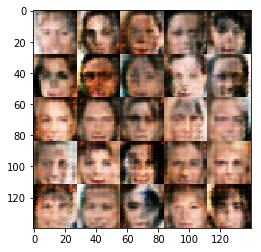

Epoch 1/1... Discriminator Loss: 1.3590... Generator Loss: 0.8268
Epoch 1/1... Discriminator Loss: 1.2293... Generator Loss: 0.9245
Epoch 1/1... Discriminator Loss: 1.4150... Generator Loss: 0.8164
Epoch 1/1... Discriminator Loss: 1.3497... Generator Loss: 0.7814
Epoch 1/1... Discriminator Loss: 1.3545... Generator Loss: 0.7932
Epoch 1/1... Discriminator Loss: 1.3570... Generator Loss: 0.8395
Epoch 1/1... Discriminator Loss: 1.4812... Generator Loss: 0.5680
Epoch 1/1... Discriminator Loss: 1.2652... Generator Loss: 0.8167
Epoch 1/1... Discriminator Loss: 1.4457... Generator Loss: 0.8006
Epoch 1/1... Discriminator Loss: 1.4098... Generator Loss: 0.8677


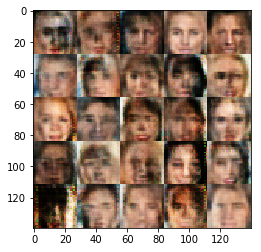

Epoch 1/1... Discriminator Loss: 1.3504... Generator Loss: 0.8426
Epoch 1/1... Discriminator Loss: 1.3618... Generator Loss: 0.7910
Epoch 1/1... Discriminator Loss: 1.3330... Generator Loss: 0.9503
Epoch 1/1... Discriminator Loss: 1.3310... Generator Loss: 0.8821
Epoch 1/1... Discriminator Loss: 1.2535... Generator Loss: 0.8775
Epoch 1/1... Discriminator Loss: 1.3056... Generator Loss: 0.8432
Epoch 1/1... Discriminator Loss: 1.2273... Generator Loss: 0.7948
Epoch 1/1... Discriminator Loss: 1.3851... Generator Loss: 0.7145
Epoch 1/1... Discriminator Loss: 1.4151... Generator Loss: 0.7344
Epoch 1/1... Discriminator Loss: 1.3438... Generator Loss: 0.6877


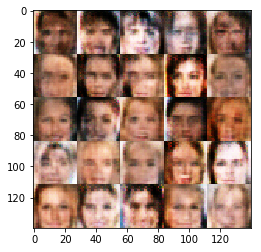

Epoch 1/1... Discriminator Loss: 1.3639... Generator Loss: 0.7302
Epoch 1/1... Discriminator Loss: 1.2750... Generator Loss: 0.8940
Epoch 1/1... Discriminator Loss: 1.4292... Generator Loss: 0.8446
Epoch 1/1... Discriminator Loss: 1.2951... Generator Loss: 0.7934
Epoch 1/1... Discriminator Loss: 1.2915... Generator Loss: 0.7125
Epoch 1/1... Discriminator Loss: 1.4689... Generator Loss: 0.7300
Epoch 1/1... Discriminator Loss: 1.3800... Generator Loss: 0.7133
Epoch 1/1... Discriminator Loss: 1.2938... Generator Loss: 0.9766
Epoch 1/1... Discriminator Loss: 1.1979... Generator Loss: 1.0040
Epoch 1/1... Discriminator Loss: 1.3993... Generator Loss: 0.7727


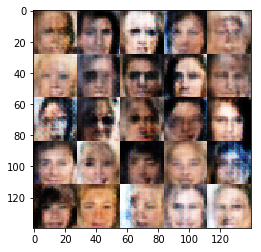

Epoch 1/1... Discriminator Loss: 1.4210... Generator Loss: 0.8739
Epoch 1/1... Discriminator Loss: 1.4061... Generator Loss: 0.6905
Epoch 1/1... Discriminator Loss: 1.3097... Generator Loss: 0.9150
Epoch 1/1... Discriminator Loss: 1.3413... Generator Loss: 0.9877
Epoch 1/1... Discriminator Loss: 1.3422... Generator Loss: 0.8370
Epoch 1/1... Discriminator Loss: 1.3329... Generator Loss: 0.7221
Epoch 1/1... Discriminator Loss: 1.3984... Generator Loss: 0.6310
Epoch 1/1... Discriminator Loss: 1.2383... Generator Loss: 1.1367
Epoch 1/1... Discriminator Loss: 1.3249... Generator Loss: 0.9496
Epoch 1/1... Discriminator Loss: 1.3838... Generator Loss: 0.9686


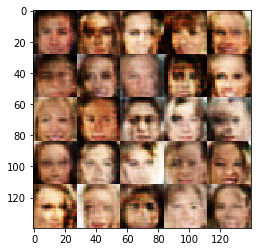

Epoch 1/1... Discriminator Loss: 1.3557... Generator Loss: 0.8380
Epoch 1/1... Discriminator Loss: 1.5406... Generator Loss: 0.4945
Epoch 1/1... Discriminator Loss: 1.3151... Generator Loss: 0.8786
Epoch 1/1... Discriminator Loss: 1.2749... Generator Loss: 0.8154
Epoch 1/1... Discriminator Loss: 1.2664... Generator Loss: 0.8623
Epoch 1/1... Discriminator Loss: 1.3243... Generator Loss: 0.7929
Epoch 1/1... Discriminator Loss: 1.5321... Generator Loss: 0.4559
Epoch 1/1... Discriminator Loss: 1.2889... Generator Loss: 0.9164
Epoch 1/1... Discriminator Loss: 1.2405... Generator Loss: 0.7177
Epoch 1/1... Discriminator Loss: 1.3466... Generator Loss: 0.6462


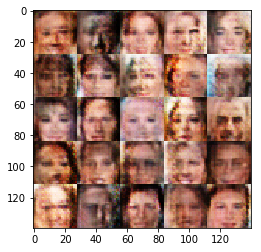

Epoch 1/1... Discriminator Loss: 1.3829... Generator Loss: 0.6740
Epoch 1/1... Discriminator Loss: 1.3556... Generator Loss: 0.8022
Epoch 1/1... Discriminator Loss: 1.6776... Generator Loss: 1.5842
Epoch 1/1... Discriminator Loss: 1.3477... Generator Loss: 0.8729
Epoch 1/1... Discriminator Loss: 1.3915... Generator Loss: 0.6752
Epoch 1/1... Discriminator Loss: 1.4120... Generator Loss: 0.8452
Epoch 1/1... Discriminator Loss: 1.3123... Generator Loss: 1.0171
Epoch 1/1... Discriminator Loss: 1.1527... Generator Loss: 1.0064
Epoch 1/1... Discriminator Loss: 1.4548... Generator Loss: 0.5014
Epoch 1/1... Discriminator Loss: 1.3350... Generator Loss: 1.1641


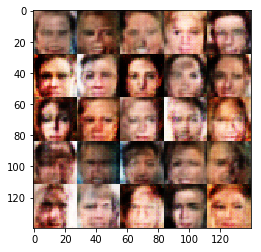

Epoch 1/1... Discriminator Loss: 2.5737... Generator Loss: 2.1673
Epoch 1/1... Discriminator Loss: 1.6517... Generator Loss: 0.5455
Epoch 1/1... Discriminator Loss: 1.2888... Generator Loss: 1.0123
Epoch 1/1... Discriminator Loss: 1.5329... Generator Loss: 0.7644
Epoch 1/1... Discriminator Loss: 1.3097... Generator Loss: 0.7848
Epoch 1/1... Discriminator Loss: 1.5624... Generator Loss: 0.4449
Epoch 1/1... Discriminator Loss: 1.4824... Generator Loss: 0.6619
Epoch 1/1... Discriminator Loss: 1.4298... Generator Loss: 0.7811
Epoch 1/1... Discriminator Loss: 1.2669... Generator Loss: 0.9651
Epoch 1/1... Discriminator Loss: 1.3898... Generator Loss: 1.0575


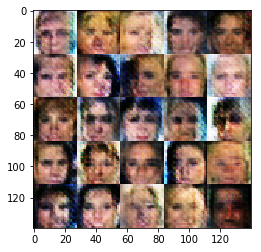

Epoch 1/1... Discriminator Loss: 1.4388... Generator Loss: 0.8820
Epoch 1/1... Discriminator Loss: 1.4839... Generator Loss: 0.7793
Epoch 1/1... Discriminator Loss: 1.3990... Generator Loss: 0.8499
Epoch 1/1... Discriminator Loss: 1.3674... Generator Loss: 0.8279
Epoch 1/1... Discriminator Loss: 1.4735... Generator Loss: 0.7812
Epoch 1/1... Discriminator Loss: 1.3670... Generator Loss: 0.8330
Epoch 1/1... Discriminator Loss: 1.4231... Generator Loss: 0.7805
Epoch 1/1... Discriminator Loss: 1.3806... Generator Loss: 0.8057
Epoch 1/1... Discriminator Loss: 1.2628... Generator Loss: 0.9433
Epoch 1/1... Discriminator Loss: 1.2766... Generator Loss: 1.0146


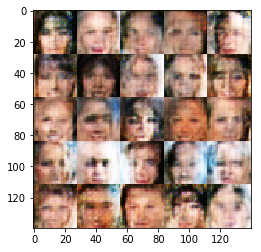

Epoch 1/1... Discriminator Loss: 1.2934... Generator Loss: 0.9568
Epoch 1/1... Discriminator Loss: 1.2201... Generator Loss: 0.8091
Epoch 1/1... Discriminator Loss: 1.3936... Generator Loss: 0.7237
Epoch 1/1... Discriminator Loss: 1.2889... Generator Loss: 0.9711
Epoch 1/1... Discriminator Loss: 1.1836... Generator Loss: 0.7828
Epoch 1/1... Discriminator Loss: 1.3273... Generator Loss: 0.8328
Epoch 1/1... Discriminator Loss: 1.3543... Generator Loss: 0.7766
Epoch 1/1... Discriminator Loss: 1.4222... Generator Loss: 0.6495
Epoch 1/1... Discriminator Loss: 1.4522... Generator Loss: 0.7489
Epoch 1/1... Discriminator Loss: 1.3882... Generator Loss: 0.6981


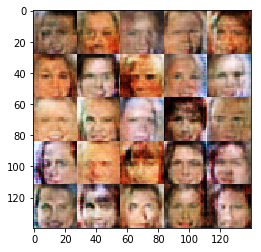

Epoch 1/1... Discriminator Loss: 1.2042... Generator Loss: 0.9795
Epoch 1/1... Discriminator Loss: 1.2979... Generator Loss: 0.8732
Epoch 1/1... Discriminator Loss: 1.4646... Generator Loss: 0.8787
Epoch 1/1... Discriminator Loss: 1.2672... Generator Loss: 1.0417
Epoch 1/1... Discriminator Loss: 1.4039... Generator Loss: 0.7556
Epoch 1/1... Discriminator Loss: 1.3585... Generator Loss: 0.7574
Epoch 1/1... Discriminator Loss: 1.3591... Generator Loss: 0.8094
Epoch 1/1... Discriminator Loss: 1.3351... Generator Loss: 0.7304
Epoch 1/1... Discriminator Loss: 1.2421... Generator Loss: 0.9172
Epoch 1/1... Discriminator Loss: 1.4981... Generator Loss: 0.7664


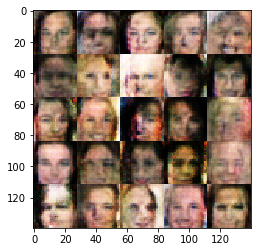

Epoch 1/1... Discriminator Loss: 1.2781... Generator Loss: 1.0726
Epoch 1/1... Discriminator Loss: 1.3854... Generator Loss: 0.7630
Epoch 1/1... Discriminator Loss: 1.3202... Generator Loss: 0.8430
Epoch 1/1... Discriminator Loss: 1.2724... Generator Loss: 0.8010
Epoch 1/1... Discriminator Loss: 1.3412... Generator Loss: 0.7151
Epoch 1/1... Discriminator Loss: 1.4010... Generator Loss: 0.8839
Epoch 1/1... Discriminator Loss: 1.4123... Generator Loss: 0.6935
Epoch 1/1... Discriminator Loss: 1.3357... Generator Loss: 1.0709
Epoch 1/1... Discriminator Loss: 1.2903... Generator Loss: 0.8614
Epoch 1/1... Discriminator Loss: 1.2873... Generator Loss: 1.0405


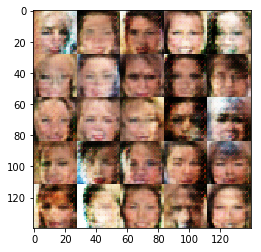

Epoch 1/1... Discriminator Loss: 1.2511... Generator Loss: 0.9427
Epoch 1/1... Discriminator Loss: 1.4914... Generator Loss: 0.6750
Epoch 1/1... Discriminator Loss: 1.4436... Generator Loss: 0.9019
Epoch 1/1... Discriminator Loss: 1.2537... Generator Loss: 0.8968
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.6043
Epoch 1/1... Discriminator Loss: 1.2523... Generator Loss: 0.8541
Epoch 1/1... Discriminator Loss: 1.3747... Generator Loss: 0.5610
Epoch 1/1... Discriminator Loss: 1.2907... Generator Loss: 0.9755
Epoch 1/1... Discriminator Loss: 1.2932... Generator Loss: 0.9563
Epoch 1/1... Discriminator Loss: 1.3913... Generator Loss: 0.7220


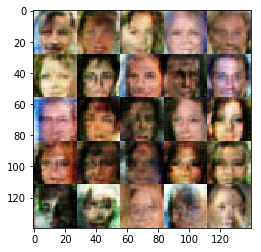

Epoch 1/1... Discriminator Loss: 1.4431... Generator Loss: 0.5690
Epoch 1/1... Discriminator Loss: 1.3860... Generator Loss: 0.6261
Epoch 1/1... Discriminator Loss: 1.3277... Generator Loss: 0.7905
Epoch 1/1... Discriminator Loss: 1.4884... Generator Loss: 0.5640
Epoch 1/1... Discriminator Loss: 1.4351... Generator Loss: 0.6961
Epoch 1/1... Discriminator Loss: 1.1824... Generator Loss: 1.0218
Epoch 1/1... Discriminator Loss: 1.2200... Generator Loss: 0.9256
Epoch 1/1... Discriminator Loss: 1.3696... Generator Loss: 1.1259
Epoch 1/1... Discriminator Loss: 1.3001... Generator Loss: 0.8999
Epoch 1/1... Discriminator Loss: 1.2087... Generator Loss: 0.9044


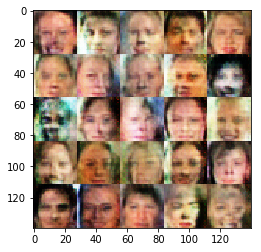

Epoch 1/1... Discriminator Loss: 1.5153... Generator Loss: 0.4859
Epoch 1/1... Discriminator Loss: 1.3940... Generator Loss: 0.7004
Epoch 1/1... Discriminator Loss: 1.4120... Generator Loss: 0.6784
Epoch 1/1... Discriminator Loss: 1.1940... Generator Loss: 0.9843
Epoch 1/1... Discriminator Loss: 0.9882... Generator Loss: 0.9662
Epoch 1/1... Discriminator Loss: 1.2385... Generator Loss: 0.9524
Epoch 1/1... Discriminator Loss: 1.1816... Generator Loss: 0.8792
Epoch 1/1... Discriminator Loss: 1.2314... Generator Loss: 0.8922
Epoch 1/1... Discriminator Loss: 1.3247... Generator Loss: 0.8722
Epoch 1/1... Discriminator Loss: 1.3391... Generator Loss: 0.7080


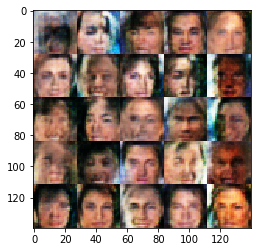

Epoch 1/1... Discriminator Loss: 1.3201... Generator Loss: 0.7973
Epoch 1/1... Discriminator Loss: 1.2909... Generator Loss: 0.8932
Epoch 1/1... Discriminator Loss: 1.2970... Generator Loss: 0.9268
Epoch 1/1... Discriminator Loss: 1.3810... Generator Loss: 0.8293
Epoch 1/1... Discriminator Loss: 1.3585... Generator Loss: 0.7347
Epoch 1/1... Discriminator Loss: 1.2795... Generator Loss: 0.8527
Epoch 1/1... Discriminator Loss: 1.2900... Generator Loss: 0.9612
Epoch 1/1... Discriminator Loss: 1.3037... Generator Loss: 0.8737
Epoch 1/1... Discriminator Loss: 1.4026... Generator Loss: 0.6813
Epoch 1/1... Discriminator Loss: 1.2460... Generator Loss: 0.8151


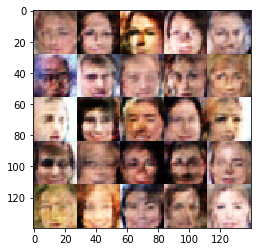

Epoch 1/1... Discriminator Loss: 1.4424... Generator Loss: 0.6842
Epoch 1/1... Discriminator Loss: 1.3842... Generator Loss: 0.5999
Epoch 1/1... Discriminator Loss: 1.3880... Generator Loss: 0.6937
Epoch 1/1... Discriminator Loss: 1.8266... Generator Loss: 0.8963
Epoch 1/1... Discriminator Loss: 1.3708... Generator Loss: 0.7585
Epoch 1/1... Discriminator Loss: 1.4431... Generator Loss: 0.5957


In [14]:
batch_size = 64
z_dim = 128
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.